<a href="https://colab.research.google.com/github/KarivetiKeerthi/Scaler-Projects/blob/main/Jamboree_Education_LinearRegression_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install numpy

In [3]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.shape

(500, 9)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
df = df.drop(['Serial No.'], axis =1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.isnull().sum()/len(df)*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [ ]:
df.isna().sum().sum()

0

In [ ]:
unique = df.nunique()
unique

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

<ipython-input-18-98f411bf7adb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure_01 = sns.distplot(df['GRE Score'], kde= False, color ='darkblue')


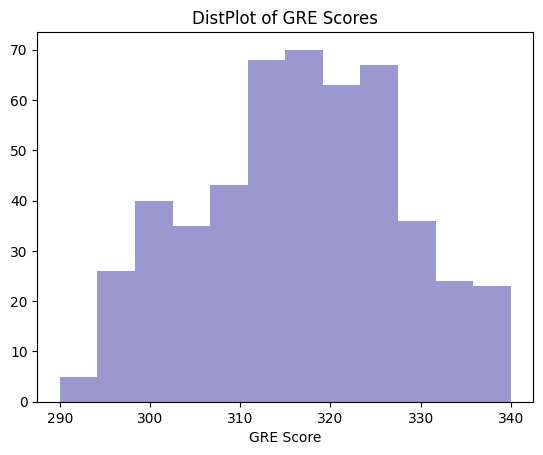

In [ ]:
figure_01 = sns.distplot(df['GRE Score'], kde= False, color ='darkblue')
plt.title("DistPlot of GRE Scores")
plt.show()

<ipython-input-23-43cb3f37413d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure_02 = sns.distplot(df['TOEFL Score'], kde= False, color ='green')


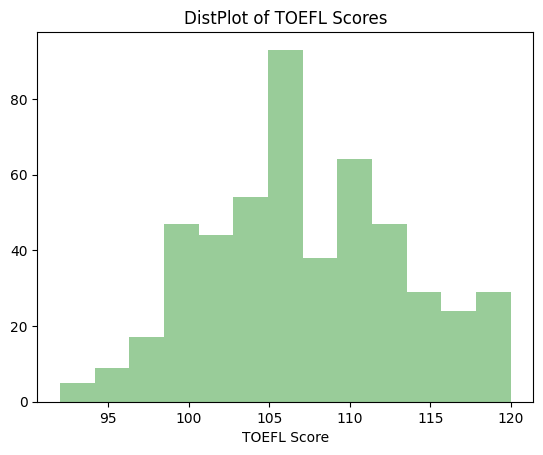

In [ ]:
figure_02 = sns.distplot(df['TOEFL Score'], kde= False, color ='green')
plt.title("DistPlot of TOEFL Scores")
plt.show()

<ipython-input-24-a274fc4e0de5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure_03 = sns.distplot(df['University Rating'], kde= False, color ='red')


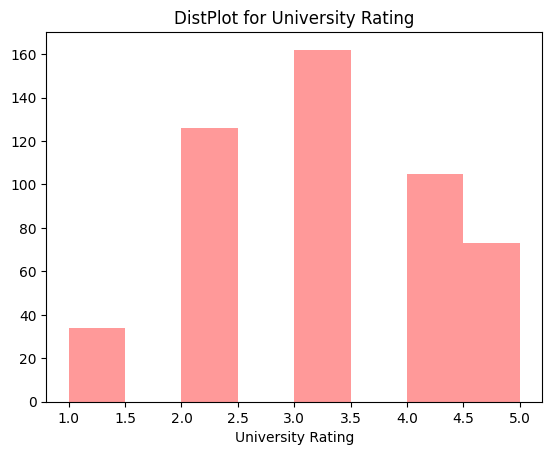

In [ ]:
figure_03 = sns.distplot(df['University Rating'], kde= False, color ='red')
plt.title("DistPlot for University Rating")
plt.show()

<ipython-input-26-9f51281e01ec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure_04 = sns.distplot(df['SOP'], kde= False, color ='orange')


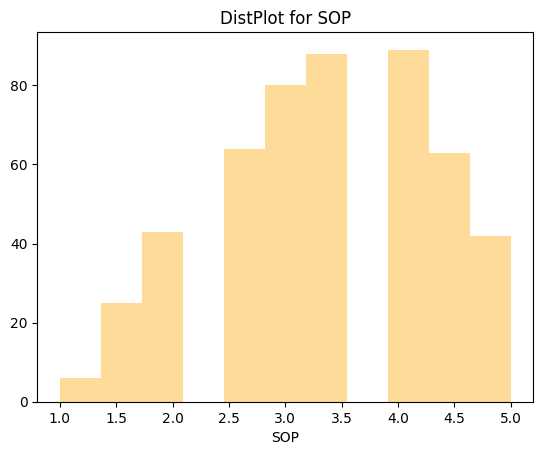

In [ ]:
figure_04 = sns.distplot(df['SOP'], kde= False, color ='orange')
plt.title("DistPlot for SOP")
plt.show()

<ipython-input-29-95226edab512>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure_05 = sns.distplot(df['CGPA'], kde= False, color ='black')


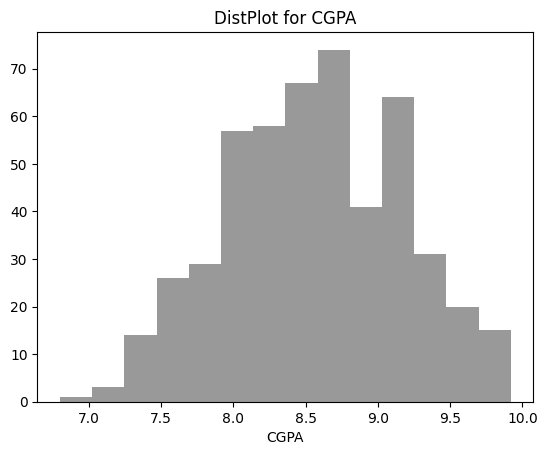

In [ ]:
figure_05 = sns.distplot(df['CGPA'], kde= False, color ='black')
plt.title("DistPlot for CGPA")
plt.show()

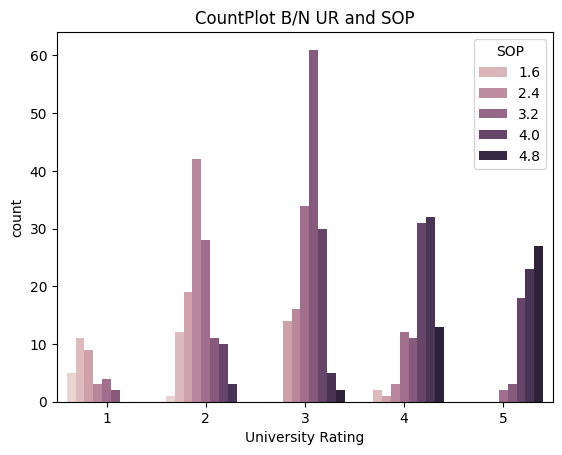

In [ ]:
countplot_01 = sns.countplot(x='University Rating', hue='SOP', data=df)
plt.title("CountPlot B/N UR and SOP")
plt.show()

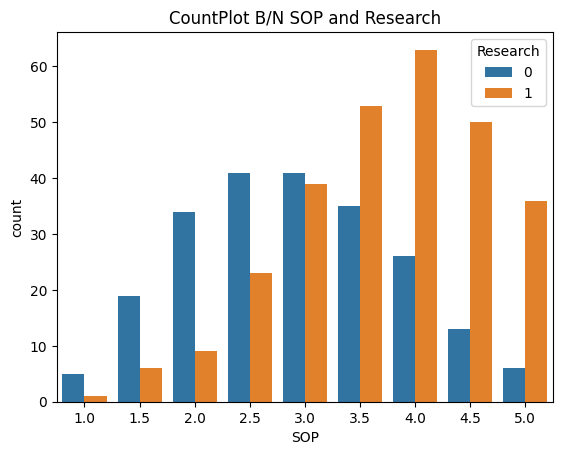

In [ ]:
countplot_02 = sns.countplot(x='SOP', hue='Research', data=df)
plt.title("CountPlot B/N SOP and Research")
plt.show()

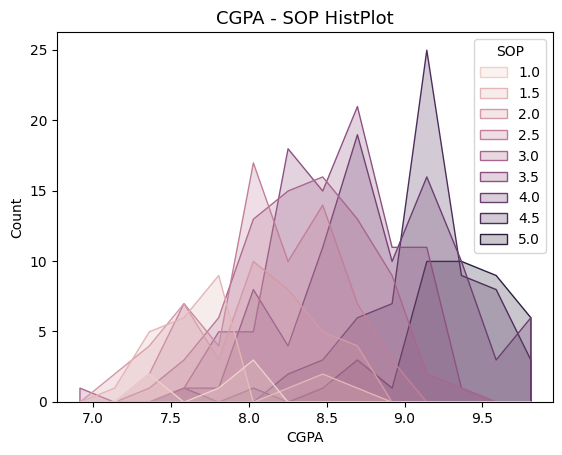

In [ ]:
Histplot_01 = sns.histplot(data = df,x ='CGPA',hue = 'SOP',element = 'poly')
plt.title('CGPA - SOP HistPlot', size= 13)
plt.show()

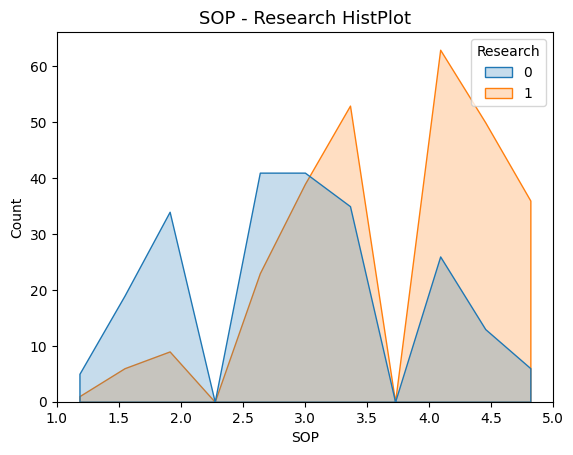

In [ ]:
Histplot_02 = sns.histplot(data = df,x ='SOP',hue = 'Research',element = 'poly')
plt.title('SOP - Research HistPlot', size= 13)
plt.show()

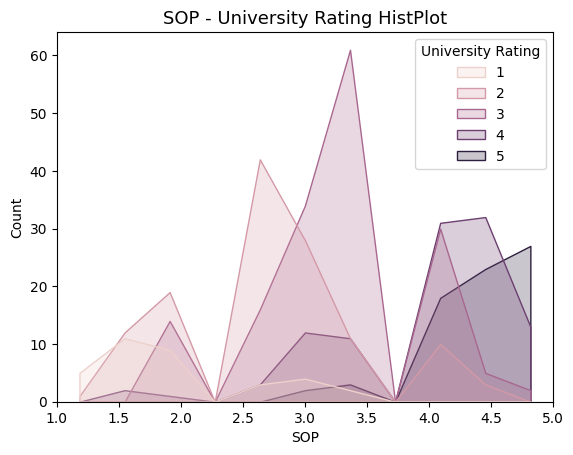

In [ ]:
Histplot_03 = sns.histplot(data = df,x ='SOP',hue = 'University Rating',element = 'poly')
plt.title('SOP - University Rating HistPlot', size= 13)
plt.show()

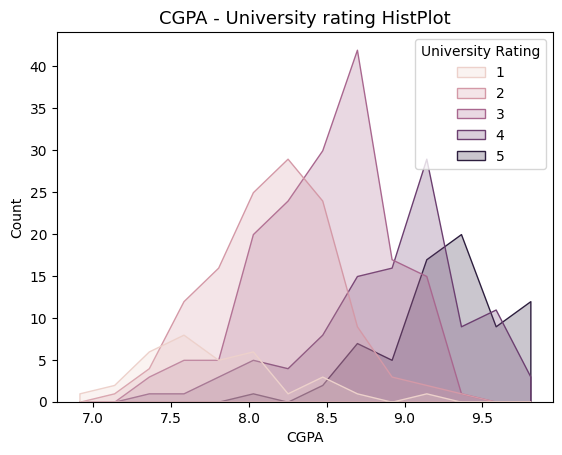

In [ ]:
Histplot_04 = sns.histplot(data = df,x ='CGPA',hue = 'University Rating',element = 'poly')
plt.title('CGPA - University rating HistPlot', size= 13)
plt.show()

Text(0.5, 1.0, 'CGPA-GRE Score HistPlot')

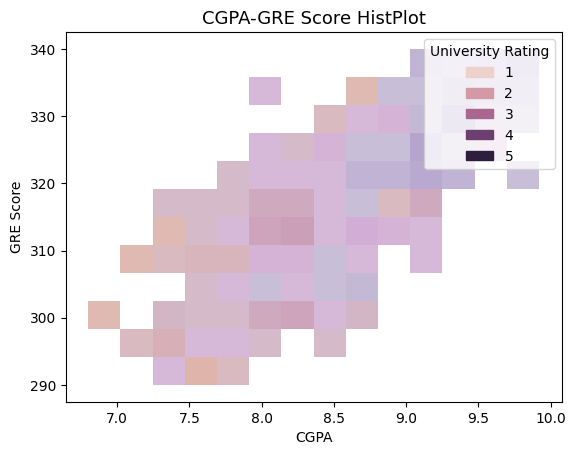

In [ ]:
Histplot_05 = sns.histplot(data = df,x='CGPA',y='GRE Score',hue = 'University Rating')
plt.title('CGPA-GRE Score HistPlot', size= 13)

Text(0.5, 1.0, 'CGPA - TOEFl Score HistPlot')

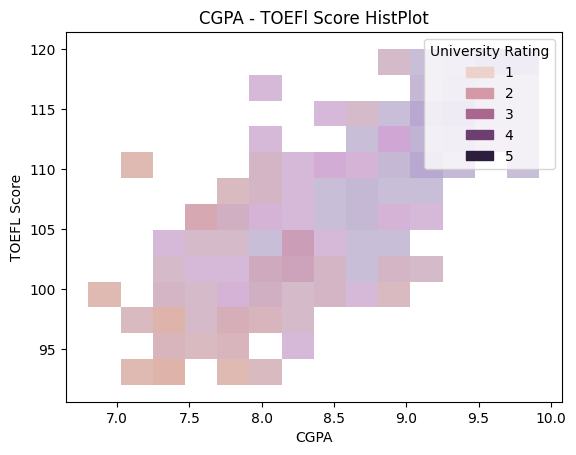

In [ ]:
Histplot_06 = sns.histplot(data = df,x='CGPA',y='TOEFL Score',hue = 'University Rating')
plt.title('CGPA - TOEFl Score HistPlot', size= 12)

Text(0.5, 1.0, 'GRE Score - University Rating BoxPlot')

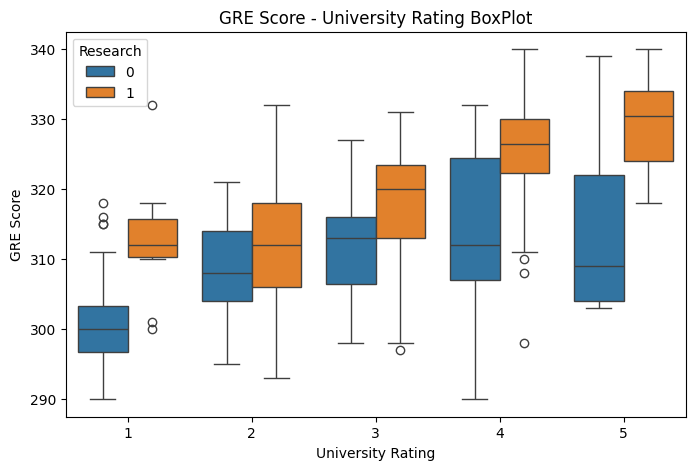

In [ ]:
plt.figure(figsize=(8,5))
Boxplot_01 = sns.boxplot(data=df, x = 'University Rating', y = 'GRE Score', hue='Research')
plt.title('GRE Score - University Rating BoxPlot', size= 12)

Text(0.5, 1.0, 'TOEFL Score - University Rating BoxPlot')

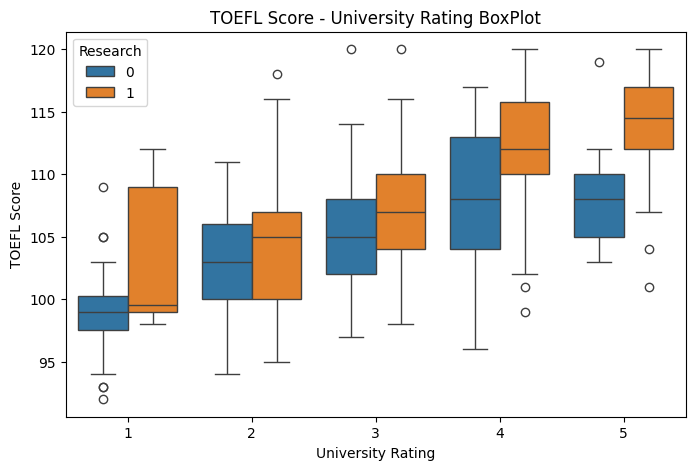

In [ ]:
plt.figure(figsize=(8,5))
Boxplot_02 = sns.boxplot(data=df, x = 'University Rating', y = 'TOEFL Score', hue='Research')
plt.title('TOEFL Score - University Rating BoxPlot', size= 12)

Text(0.5, 1.0, 'GRE Score - SOP BoxPlot')

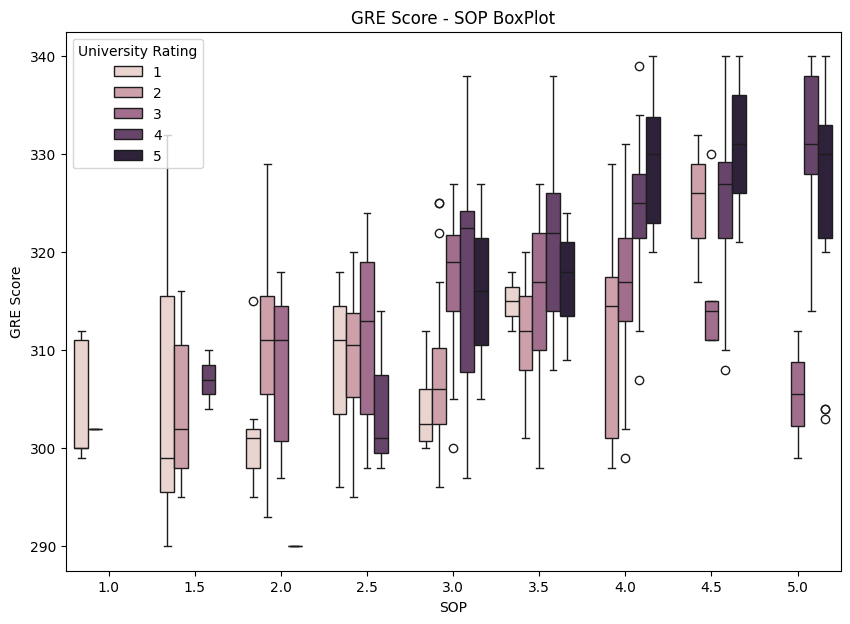

In [ ]:
plt.figure(figsize=(10,7))
Boxplot_03 = sns.boxplot(data=df, x = 'SOP', y = 'GRE Score', hue='University Rating')
plt.title('GRE Score - SOP BoxPlot', size= 12)

Text(0.5, 1.0, 'TOEFL Score - SOP BoxPlot')

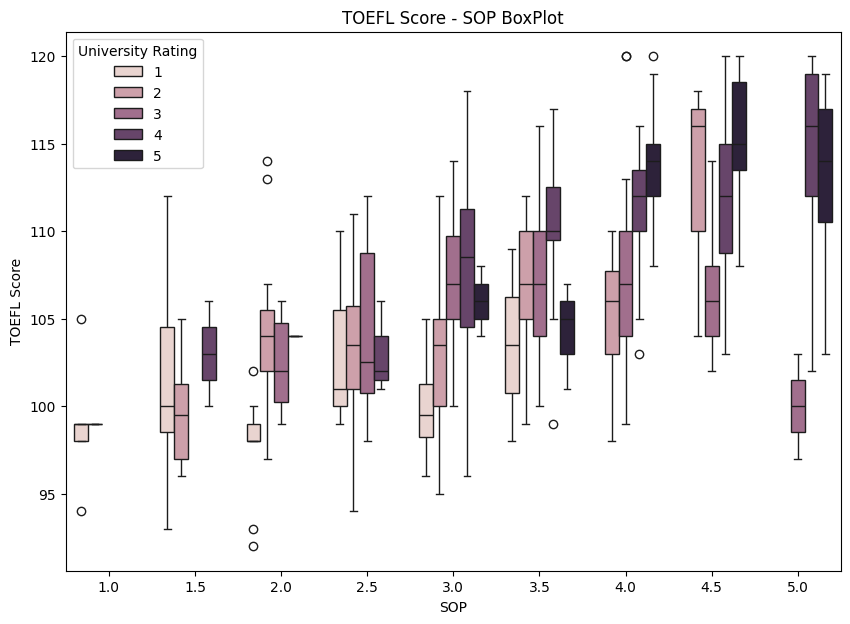

In [ ]:
plt.figure(figsize=(10,7))
Boxplot_04 = sns.boxplot(data=df, x = 'SOP', y = 'TOEFL Score', hue='University Rating')
plt.title('TOEFL Score - SOP BoxPlot', size= 12)

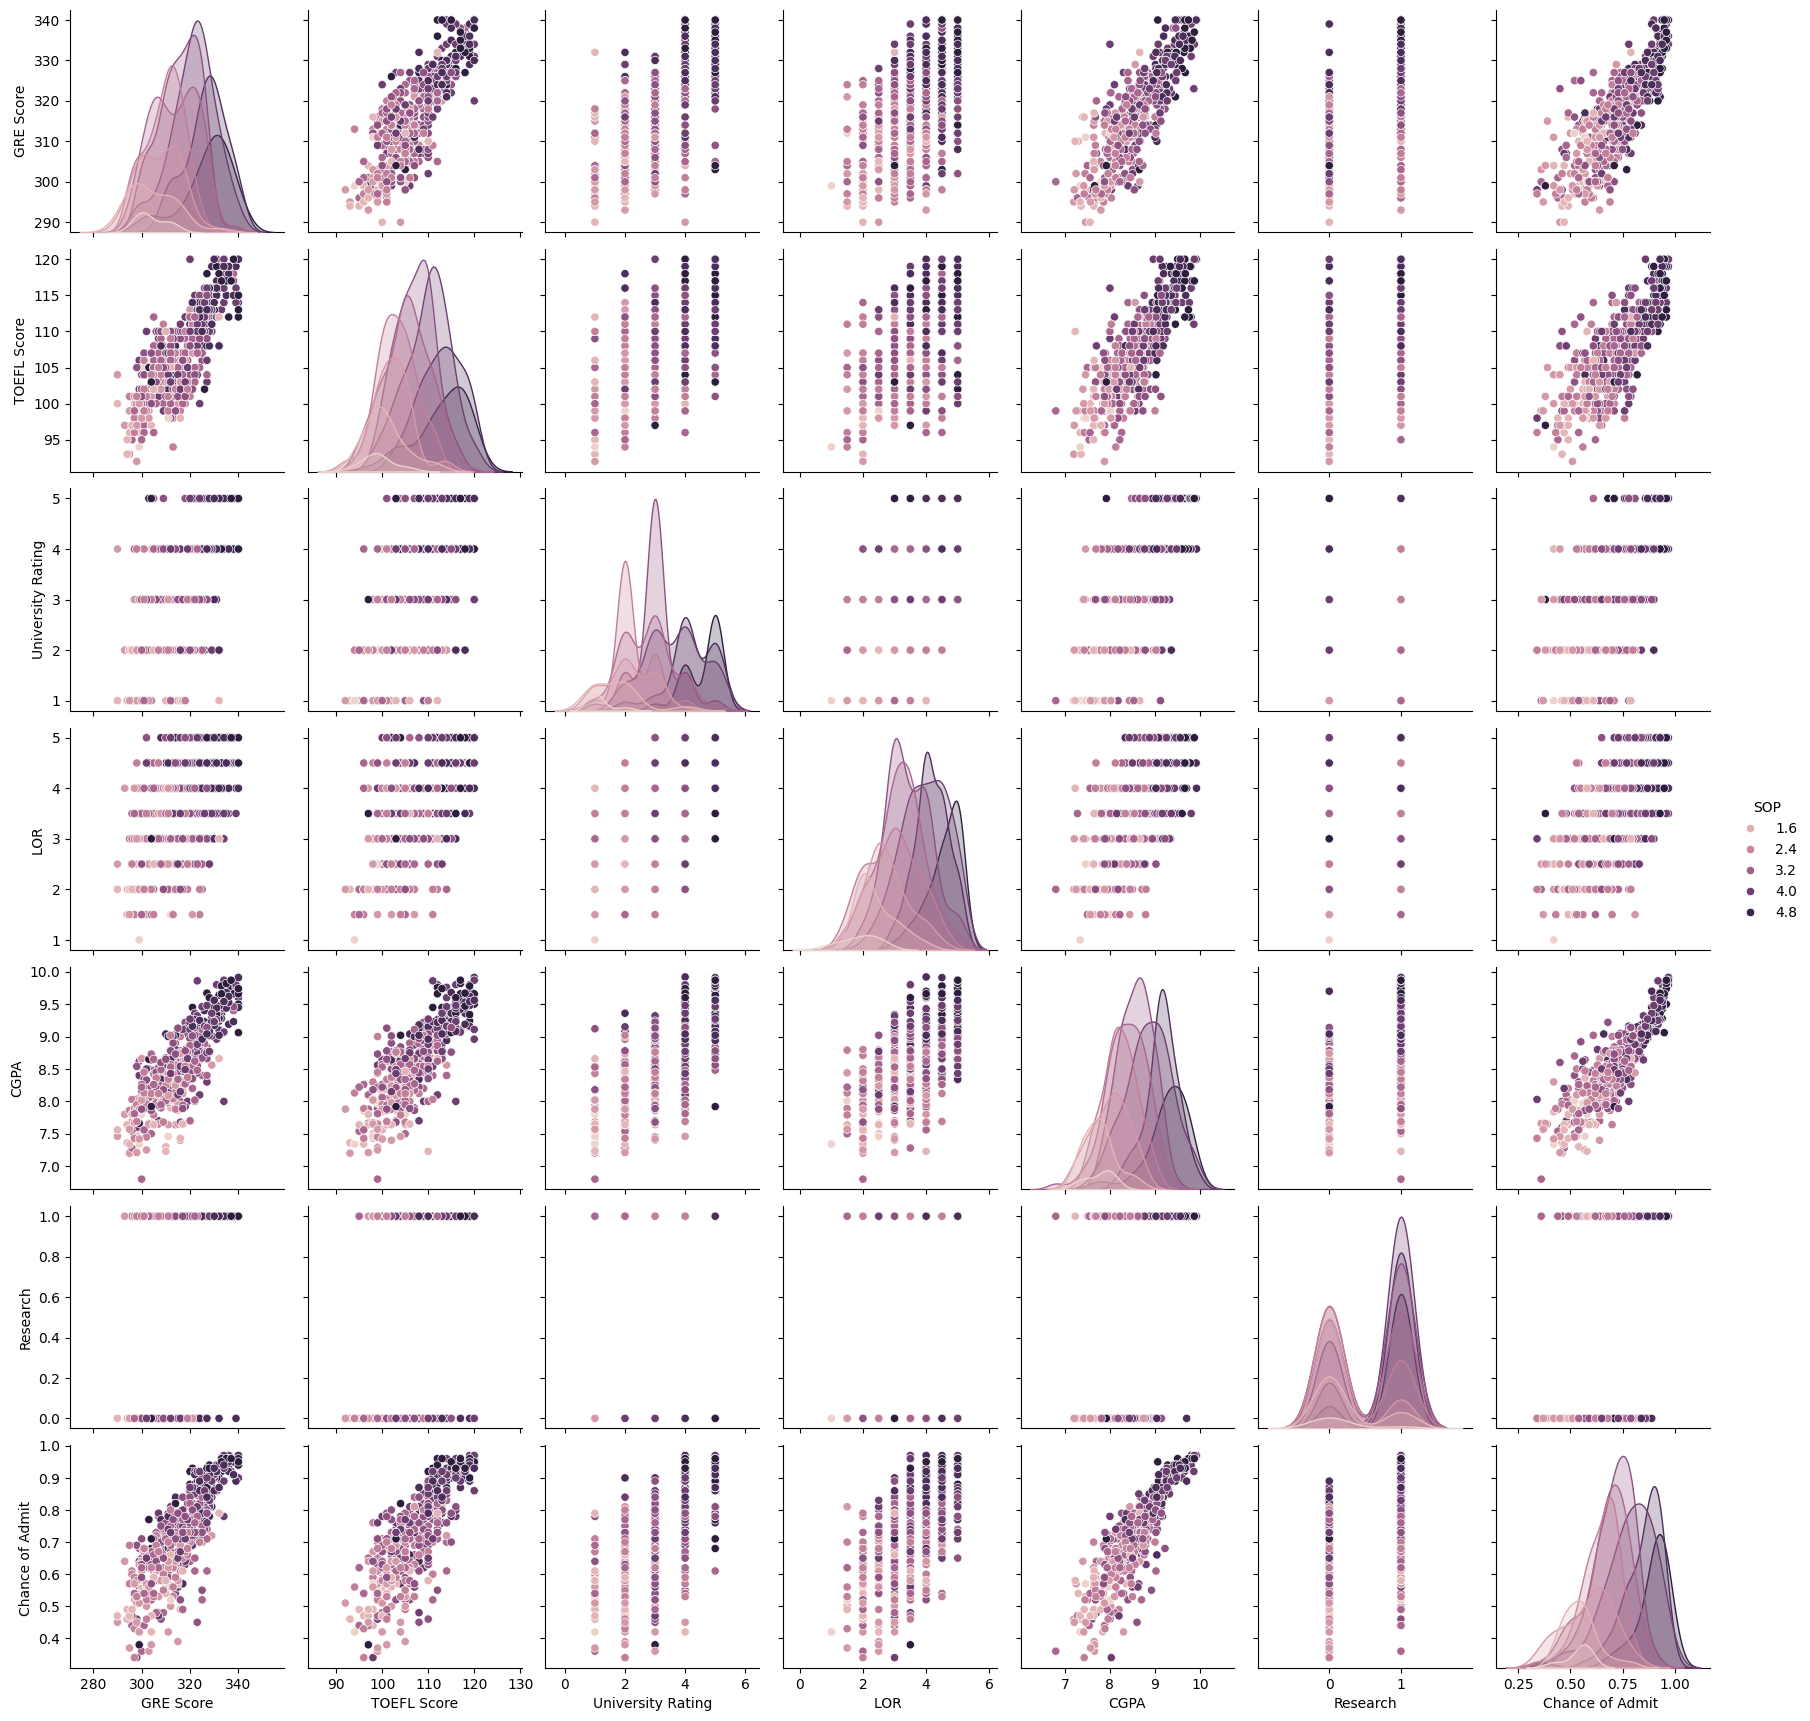

In [ ]:
sns.pairplot(data=df,hue='SOP')

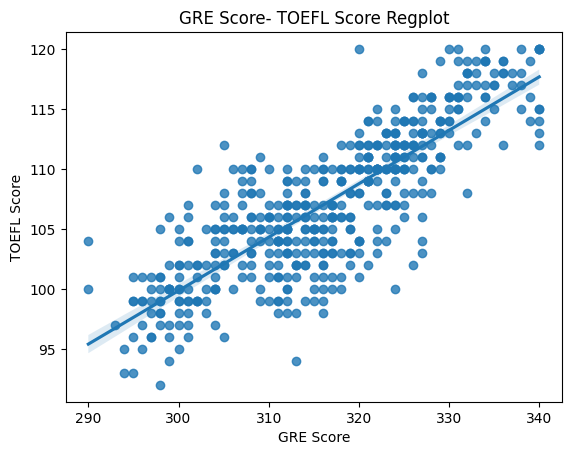

In [ ]:
regplot_01 = sns.regplot(x='GRE Score', y='TOEFL Score', data= df)
plt.title("GRE Score- TOEFL Score Regplot")
plt.show()

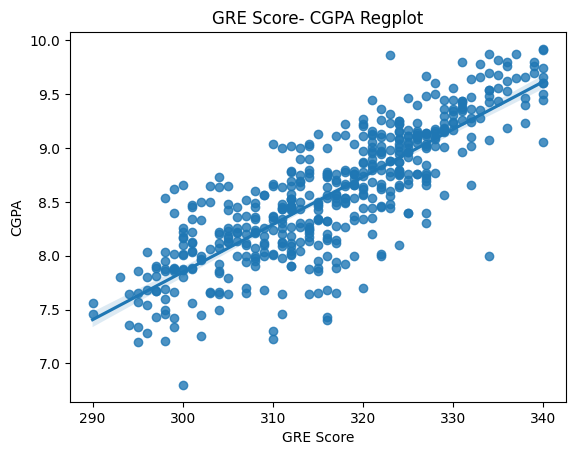

In [ ]:
regplot_02 = sns.regplot(x='GRE Score', y='CGPA', data= df)
plt.title("GRE Score- CGPA Regplot")
plt.show()

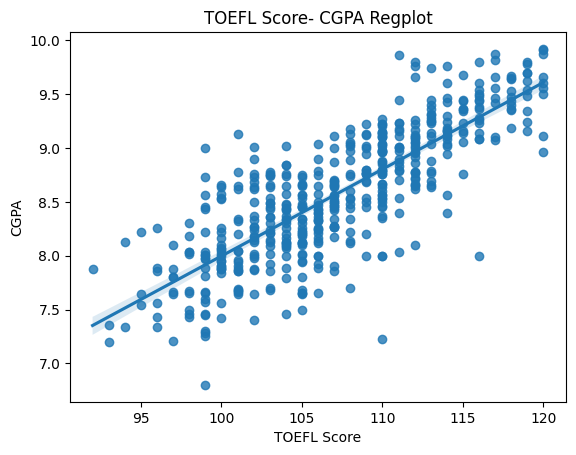

In [ ]:
regplot_03 = sns.regplot(x='TOEFL Score', y='CGPA', data= df)
plt.title("TOEFL Score- CGPA Regplot")
plt.show()

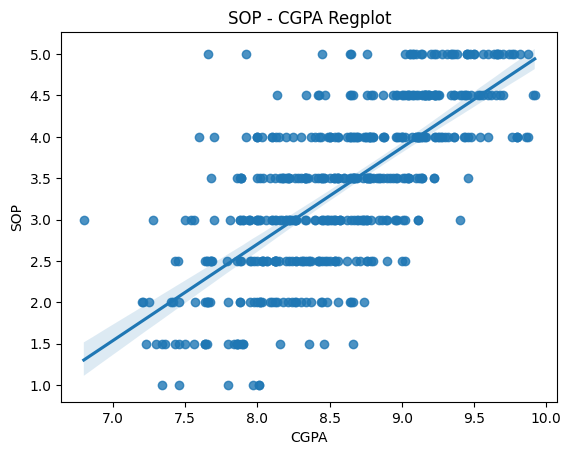

In [ ]:
regplot_04 = sns.regplot(x='CGPA', y='SOP', data= df)
plt.title("SOP - CGPA Regplot")
plt.show()

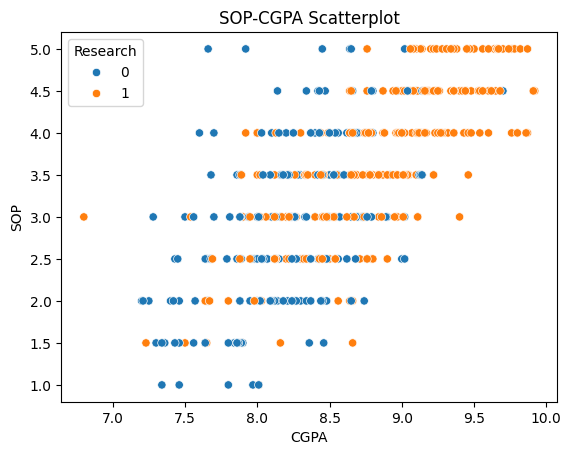

In [ ]:
scatterplot_01 = sns.scatterplot(x='CGPA', y='SOP',data = df, hue='Research')
plt.title('SOP-CGPA Scatterplot')
plt.show()

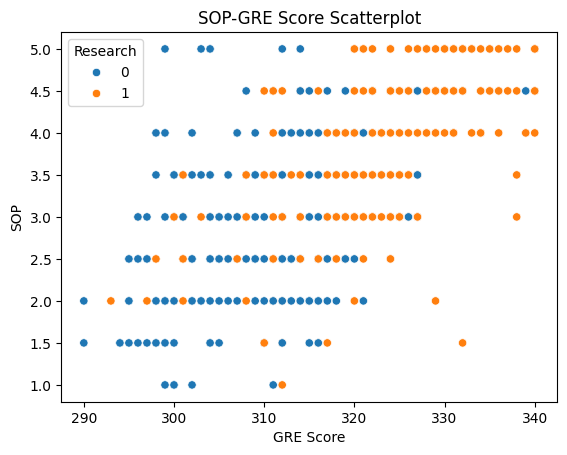

In [ ]:
scatterplot_02 = sns.scatterplot(x='GRE Score', y='SOP',data = df, hue='Research')
plt.title('SOP-GRE Score Scatterplot')
plt.show()

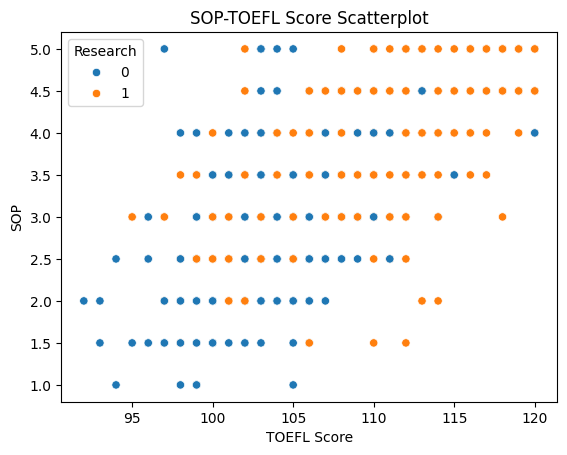

In [ ]:
scatterplot_03 = sns.scatterplot(x='TOEFL Score', y='SOP',data = df, hue='Research')
plt.title('SOP-TOEFL Score Scatterplot')
plt.show()

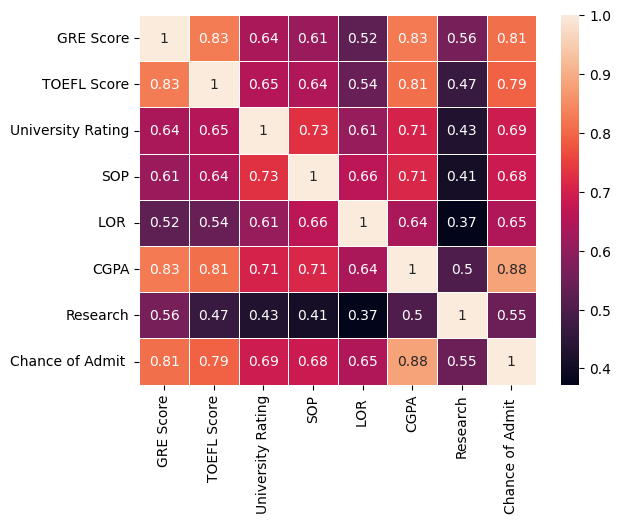

In [ ]:
corr = df.corr()
corr_01 = sns.heatmap(corr, linewidths = 0.5, annot = True)
plt.show()

In [ ]:
duplicate = df[df.duplicated()]
print('Duplicate Rows :')
duplicate

Duplicate Rows :


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [ ]:
Q1 = np.percentile(df['GRE Score'], 25, method='midpoint')
Q3 = np.percentile(df['GRE Score'], 75, method='midpoint')
IQR_GRE = Q3 - Q1
print(IQR_GRE);

17.0


In [ ]:
Q1 = np.percentile(df['TOEFL Score'], 25, method='midpoint')
Q3 = np.percentile(df['TOEFL Score'], 75, method='midpoint')
IQR_TOEFL = Q3 - Q1
print(IQR_TOEFL) ;

9.0


In [ ]:
Q1 = np.percentile(df['University Rating'], 25, method='midpoint')
Q3 = np.percentile(df['University Rating'], 75, method='midpoint')
IQR_UR = Q3 - Q1
print(IQR_UR)

2.0


In [ ]:
Q1 = np.percentile(df['SOP'], 25, method='midpoint')
Q3 = np.percentile(df['SOP'], 75, method='midpoint')
IQR_SOP = Q3 - Q1
print(IQR_SOP) ;

1.5


In [ ]:
Q1 = np.percentile(df['LOR '], 25, method='midpoint')
Q3 = np.percentile(df['LOR '], 75, method='midpoint')
IQR_LOR = Q3 - Q1
print(IQR_LOR)

1.0


In [ ]:
Q1 = np.percentile(df['CGPA'], 25, method='midpoint')
Q3 = np.percentile(df['CGPA'], 75, method='midpoint')
IQR_CGPA = Q3 - Q1
print(IQR_CGPA)

0.9149999999999991


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Chance of Admit '], axis = 1)
Y = df['Chance of Admit ']

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, shuffle = True)

In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
356,327,109,3,3.5,4.0,8.77,1
260,327,108,5,5.0,3.5,9.13,1
177,319,110,3,3.5,3.5,9.04,0
403,330,116,4,4.0,3.5,9.23,1
155,312,109,3,3.0,3.0,8.69,0
...,...,...,...,...,...,...,...
101,312,105,2,2.5,3.0,8.12,0
313,301,100,3,3.5,3.0,8.04,0
151,332,116,5,5.0,5.0,9.28,1
412,314,102,4,2.5,2.0,7.88,1


In [ ]:
Y_train

356    0.79
260    0.87
177    0.82
403    0.91
155    0.77
       ... 
101    0.64
313    0.67
151    0.94
412    0.59
236    0.85
Name: Chance of Admit , Length: 375, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_columns = X_train.columns
std = StandardScaler()
X_train_std = std.fit_transform(X_train)

In [ ]:
X_train_std

array([[-0.61671914, -0.85367582, -0.09559629, ...,  0.52769661,
        -0.94901078,  0.8673733 ],
       [-1.32722506, -1.34618109, -1.84430894, ..., -1.62910153,
        -2.22682314, -1.15290613],
       [ 0.53785298,  0.45967159, -0.09559629, ..., -0.01150292,
         0.84324553,  0.8673733 ],
       ...,
       [ 1.33717214,  1.773019  , -0.96995261, ..., -0.01150292,
         1.27471464,  0.8673733 ],
       [-0.0838397 , -0.52533896, -0.09559629, ..., -0.01150292,
        -0.98220071,  0.8673733 ],
       [-0.70553238, -0.36117054,  1.65311635, ..., -0.01150292,
        -0.05288262, -1.15290613]])

In [ ]:
X_train = pd.DataFrame(X_train_std, columns = X_train_columns)

In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.844136,0.127776,-0.112919,-0.383067,0.014573,0.540866,-1.104054
1,-0.149887,-0.207301,-0.112919,1.139727,0.014573,-0.251089,-1.104054
2,-0.330618,-0.542378,-0.112919,0.632129,1.107514,0.136463,-1.104054
3,-0.601715,-0.877455,-0.112919,0.124531,0.561043,-0.925094,0.905753
4,-0.059521,-0.709916,-0.112919,0.124531,-1.624840,-1.497997,-1.104054
...,...,...,...,...,...,...,...
370,0.934502,1.803160,0.769261,1.647325,1.653985,1.855175,0.905753
371,-1.234275,-1.380070,-0.112919,-1.398264,-1.078369,-1.531698,-1.104054
372,-1.505373,-1.547608,-1.877278,-1.398264,-1.078369,-0.925094,-1.104054
373,1.024868,0.462853,0.769261,0.632129,-1.078369,0.759918,0.905753


In [ ]:
Y_train

154    0.80
86     0.72
230    0.73
207    0.66
417    0.52
       ... 
446    0.93
94     0.36
409    0.61
245    0.81
210    0.79
Name: Chance of Admit , Length: 375, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
models = [['LinearRegression :', LinearRegression()]]
for name,model in models :
  model.fit(X_train,Y_train.values)
  predictions = model.predict(std.transform(X_test))
  print(name, (np.sqrt(mean_squared_error(Y_test, predictions))))

LinearRegression : 0.05213628019945005


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
models_01 = [['Lasso Regression :', Lasso(alpha=0.1)],
          ['Ridge Regression :', Ridge(alpha=1.0)]]
for name,model in models_01 :
  model.fit(X_train,Y_train.values)
  predictions = model.predict(std.transform(X_test))
  print(name, (np.sqrt(mean_squared_error(Y_test, predictions))))

Lasso Regression : 0.12035558430680876
Ridge Regression : 0.05212619865166508


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     238.0
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          3.17e-132
Time:                        17:10:44   Log-Likelihood:                 519.81
No. Observations:                 375   AIC:                            -1024.
Df Residuals:                     367   BIC:                            -992.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7176      0.00

In [ ]:
X_train_new = X_train.drop(columns = 'SOP')

In [ ]:
X_train_new

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,-0.616719,-0.853676,-0.095596,0.527697,-0.949011,0.867373
1,1.0,-1.327225,-1.346181,-1.844309,-1.629102,-2.226823,-1.152906
2,1.0,0.537853,0.459672,-0.095596,-0.011503,0.843246,0.867373
3,1.0,0.893106,0.295503,-0.095596,0.527697,0.295612,0.867373
4,1.0,0.271413,0.952177,-0.969953,-1.089902,0.079877,0.867373
...,...,...,...,...,...,...,...
370,1.0,0.449040,0.459672,-0.095596,-1.089902,0.129662,0.867373
371,1.0,2.047678,2.101356,0.778760,1.606096,1.507044,0.867373
372,1.0,1.337172,1.773019,-0.969953,-0.011503,1.274715,0.867373
373,1.0,-0.083840,-0.525339,-0.095596,-0.011503,-0.982201,0.867373


In [ ]:
model_01 = sm.OLS(Y_train.values, X_train_new).fit()
print(model_01.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     278.4
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          1.84e-133
Time:                        17:10:54   Log-Likelihood:                 519.80
No. Observations:                 375   AIC:                            -1026.
Df Residuals:                     368   BIC:                            -998.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7176      0.00

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(dataset,col):
  dataset = dataset.drop(columns = col, axis=1)
  vif = pd.DataFrame()
  vif['fetures'] = dataset.columns
  vif['VIF_Value'] = [variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
  return vif

In [ ]:
cal_vif(X_train_new,[])

,fetures,VIF_Value
0,const,1.000000
1,GRE Score,4.818767
2,TOEFL Score,3.947010
3,University Rating,2.246163
4,LOR,1.835667
5,CGPA,4.879704
6,Research,1.542455


In [ ]:
X_test_std = std.transform(X_test)

In [ ]:
X_test = pd.DataFrame(X_test_std, columns = X_train_columns)


In [ ]:
X_test =sm.add_constant(X_test)

In [ ]:
X_test_del = list(set(X_test.columns.difference(set(X_train_new.columns))))

In [ ]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [ ]:
X_test_new = X_test.drop(columns = X_test_del)

In [ ]:
Prediction = model_01.predict(X_test_new)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Mean Absolute error', mean_absolute_error(Y_test.values,Prediction) )
print('Root Mean Square Error', np.sqrt(mean_squared_error(Y_test.values, Prediction) ))

Mean Absolute error 0.04183662202394231
Root Mean Square Error 0.05721171826589721


In [ ]:
Residuals = Y_test.values-Prediction
mean_residuals = np.mean(Residuals)
print('Mean of Residuals {}'.format(mean_residuals))

Mean of Residuals 0.013883727778674838


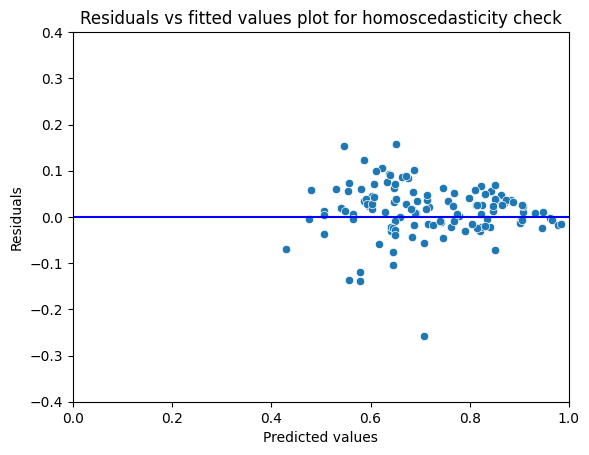

In [ ]:
Homo = sns.scatterplot(x = Prediction, y = Residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
Homo = sns.lineplot([0,0],color = 'blue')
Homo = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(Residuals, X_test)
lzip(name,test)

[('F statistic', 2.1143443184230035), ('p-value', 0.003226359215718424)]

<ipython-input-45-f0ebeb075a56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Normality = sns.distplot(Residuals, kde=True)


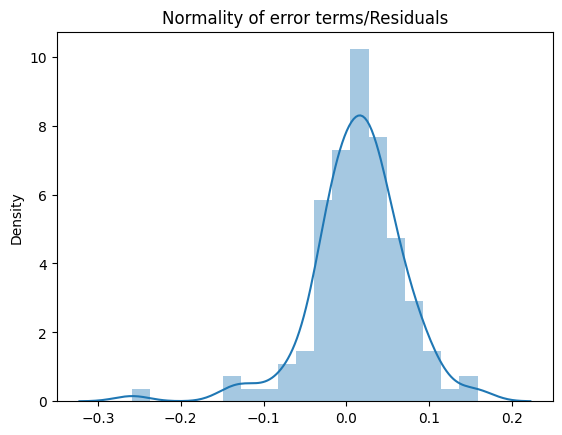

In [ ]:
Normality = sns.distplot(Residuals, kde=True)
Normality = plt.title('Normality of error terms/Residuals')

Text(0, 0.5, 'Y_Predicted')

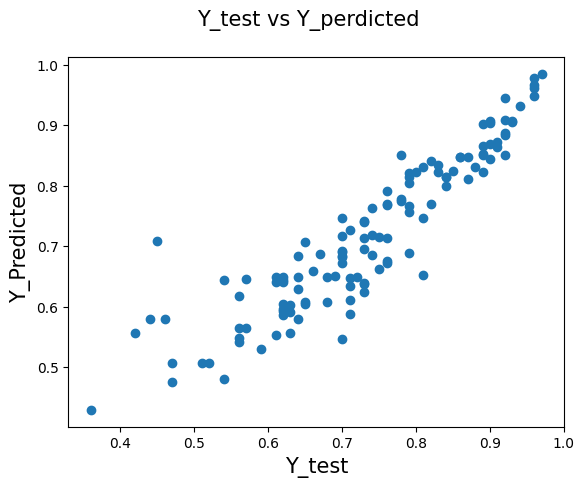

In [ ]:
Figure = plt.figure()
plt.scatter(Y_test.values, Prediction)
Figure.suptitle('Y_test vs Y_perdicted', fontsize = 15)
plt.xlabel('Y_test', fontsize = 15)
plt.ylabel('Y_Predicted', fontsize=15)